# Harmonic forcing of a single degree of freedom system

[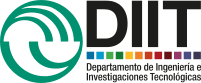](https://ingenieria.unlam.edu.ar/)    
[cc-by-sa](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

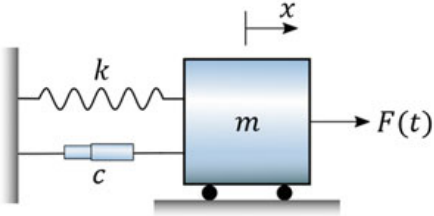

A force $\vec{F}(t)$ is exerted upon a system with the following characteristics

- m : mass  
- c : linear dumping coefficient, for a dumping force proportional to velocity  
- k : spring coefficient

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration
import warnings
warnings.filterwarnings("ignore")

In [2]:
t = sm.symbols('t') # time
m, k, c = sm.symbols('m, k, c', positive = True)
x, F = me.dynamicsymbols('x F')

For a damping proportional to the velocity, the dynamics is described by

In [3]:
x_EL_homogeneous = m* x.diff(t,2) + c* x.diff(t) + k* x
x_EL_forced = sm.Eq(x_EL_homogeneous, F)
x_EL_forced

that engineers usually write as

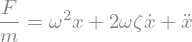

In [4]:
omega, zeta = sm.symbols('omega zeta', real = True)
x_EL_ing = sm.Eq(x_EL_forced.lhs/m, x_EL_forced.rhs/m).expand()
x_EL_ing = x_EL_ing.subs([(k/m, omega**2), (c/m, 2* zeta* omega) ]).simplify()
x_EL_ing.expand()

## Harmonic forcing

We saw that when $F=0$ the motion extinguishes more or less rapidly as a function of the damping $c$, but it eventually does so.
The solution of the homogeneous equation then produces a **transient solution**.
In the presence of $F(t)$ this determines the **steady-state solution** which is what finally dominates the dynamics.
The system's response to a harmonic force will be studied first

> **Reference**
>- Section 6.5 "Forced Oscillations". Jerry B. Marion. Classical Dynamics of particles and systems. Academic Press.

In [5]:
F_0, omega_f = sm.symbols('F_0 omega_f', positive = True)
F_harmonic = F_0* sm.sin(omega_f* t)
sm.Eq(F, F_harmonic)

The differential equation that we must solve is

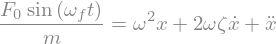

In [6]:
x_EL_ing_forcedHarmonic = x_EL_ing.expand().subs(F, F_harmonic)
x_EL_ing_forcedHarmonic

We know that by substituting the particular solution that responds to such forcing $x_p = A_1 \cos{\omega_f t} + A_2 \sin{\omega_f t}$ into the equation allows us to obtain the $A_i$.
But `sympy` can handle the entire process and give us $x = x_h + x_p$ directly.

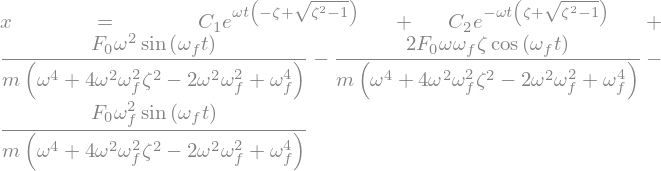

In [7]:
x_forcedHarmonic_sol = sm.dsolve(x_EL_ing_forcedHarmonic)
x_forcedHarmonic_sol

The terms that depend on $C_i$ are those of the homogeneous solution which is considered to be present during a **transient** that becomes extinct for $t > 10\tau$ (10 **relaxation periods**).
For later times the solution reaches the **steady state** given by the terms that depend on the forcing.
We set $C_1 = C_2 = 0$ to obtain only $x_p(t)$.

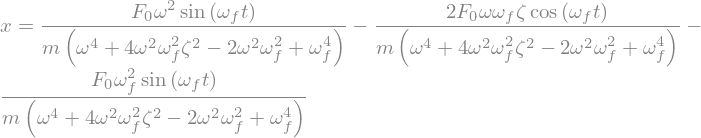

In [8]:
x_forcedHarmonic = x_forcedHarmonic_sol.subs([('C1', 0), ('C2', 0)])
x_forcedHarmonic

## Response to forcing in the under-damped regime

Using the same parameters than in the case without forcing, in the under-damped regime, $\zeta = 0.2$.

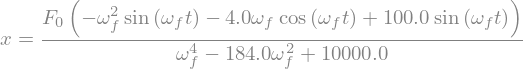

In [9]:
k_magnitude = 100 # [N m-1]
m_magnitude = 1 # [kg]
zeta_magnitude = 0.2 # [s-1]

parameters ={
    zeta : zeta_magnitude,
    omega : sm.sqrt(k_magnitude/m_magnitude),
    m : m_magnitude
}
x_forcedHarmonic_parameters = x_forcedHarmonic.subs(parameters).simplify()
x_forcedHarmonic_parameters

It becomes of interest how the amplitude of the oscillation of $x$ varies as a function of the forcing parameters.
Evidently it is linear with the amplitude of the same.
It is with its frequency $\omega_f$ where different behaviors are presented.

In [10]:
F_0_magnitude = 100 # [N]
x_forcedHarmonic_omega_f = x_forcedHarmonic_parameters.subs(F_0, F_0_magnitude)

To analyze the amplitude it suffices to group the terms with $\sin{(\omega_f t)}$ and those with $\cos{(\omega_f t)}$ and operate in the same way as when converting complex numbers from rectangular to polar form.
Since $a^2 \cos^2{\omega_f t} + b^2 \sin^2{\omega_f t} = a^2 + b^2 = R^2$, where $R$ is the equivalent to the modulus of the complex number.

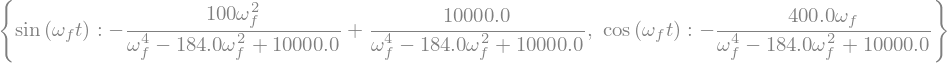

In [11]:
rectangular = sm.collect(x_forcedHarmonic_omega_f.rhs.expand(trig=True), [sm.sin(omega_f* t), sm.cos(omega_f* t)], evaluate=False)
rectangular

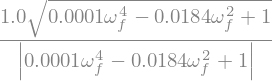

In [12]:
timesSine = rectangular[sm.sin(omega_f* t)]
timesCosine = rectangular[sm.cos(omega_f* t)]
magnitude = sm.sqrt(timesSine**2 + timesCosine**2).simplify()
magnitude

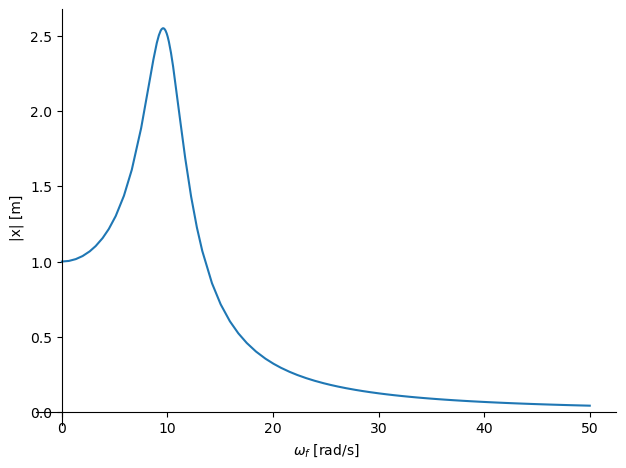

In [13]:
sm.plot(magnitude, (omega_f,0, 50), ylabel='|x| [m]', xlabel=r'$\omega_f$ [rad/s]') 

What is the value of $\omega$ at the peak? No other than

In [14]:
sm.Eq(omega, sm.sqrt(k_magnitude/m_magnitude))

When a system is excited with a harmonic oscillation at the frequency at which the isolated system would oscillate, the energy transfer is maximum and therefore the maximum oscillation amplitude is reached.
This is called **resonance** and is something that must be avoided if relative stability of the system is sought.